In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math

In [26]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

 ### 1.to Get The Model Function:-
 
 $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    
    
### 2.Gradient Descent Equation:

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$



### 3-Dravitives in the Gradient Descent:

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3} 
\end{align*}$$

In [45]:
def compute_gradient_logistic(X, y, w, b, *argv):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = 1 / (1 + np.exp(-z_i))

        dj_db_i = f_wb_i - y[i]
        dj_db += dj_db_i

        for j in range(n):
            dj_dw_ij = (f_wb_i - y[i]) * X[i, j]
            dj_dw[j] += dj_dw_ij

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [48]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = w_in  
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i<100000:      
            J_history.append( compute_gradient_logistic(X, y, w, b) )

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history        

In [49]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000


w_out, b_out, J_history = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost (0.014924742767851254, array([-0.22449108, -0.14601523]))   
Iteration 1000: Cost (0.03292263785587346, array([-0.01154724, -0.01179442]))   
Iteration 2000: Cost (0.017933890941894477, array([-0.00639134, -0.0064637 ]))   
Iteration 3000: Cost (0.01219290340280725, array([-0.00437133, -0.00440444]))   
Iteration 4000: Cost (0.009205288270528337, array([-0.00331049, -0.00332914]))   
Iteration 5000: Cost (0.007382936755160792, array([-0.00266019, -0.00267204]))   
Iteration 6000: Cost (0.006158304660621156, array([-0.00222181, -0.00222997]))   
Iteration 7000: Cost (0.005279886586599484, array([-0.00190669, -0.00191261]))   
Iteration 8000: Cost (0.004619558128642703, array([-0.00166943, -0.00167391]))   
Iteration 9000: Cost (0.0041053232770014575, array([-0.00148444, -0.00148794]))   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


In [55]:
def compute_model_function(x_tr, w, b):
    m = x_tr.shape[0]
    z_i = np.zeros(m)
    prediction = np.zeros(m)
    
    for i in range(m):
        z_i[i] = np.dot(x_tr[i], w) + b
        prediction[i] = 1 / (1 + np.exp(-z_i[i]))
    
    return prediction


In [57]:
prediction = compute_model_function(X_train, w_out, b_out)
prediction

array([0.01862297, 0.02057229, 0.02272091, 0.98463772, 0.99849336,
       0.97711696])

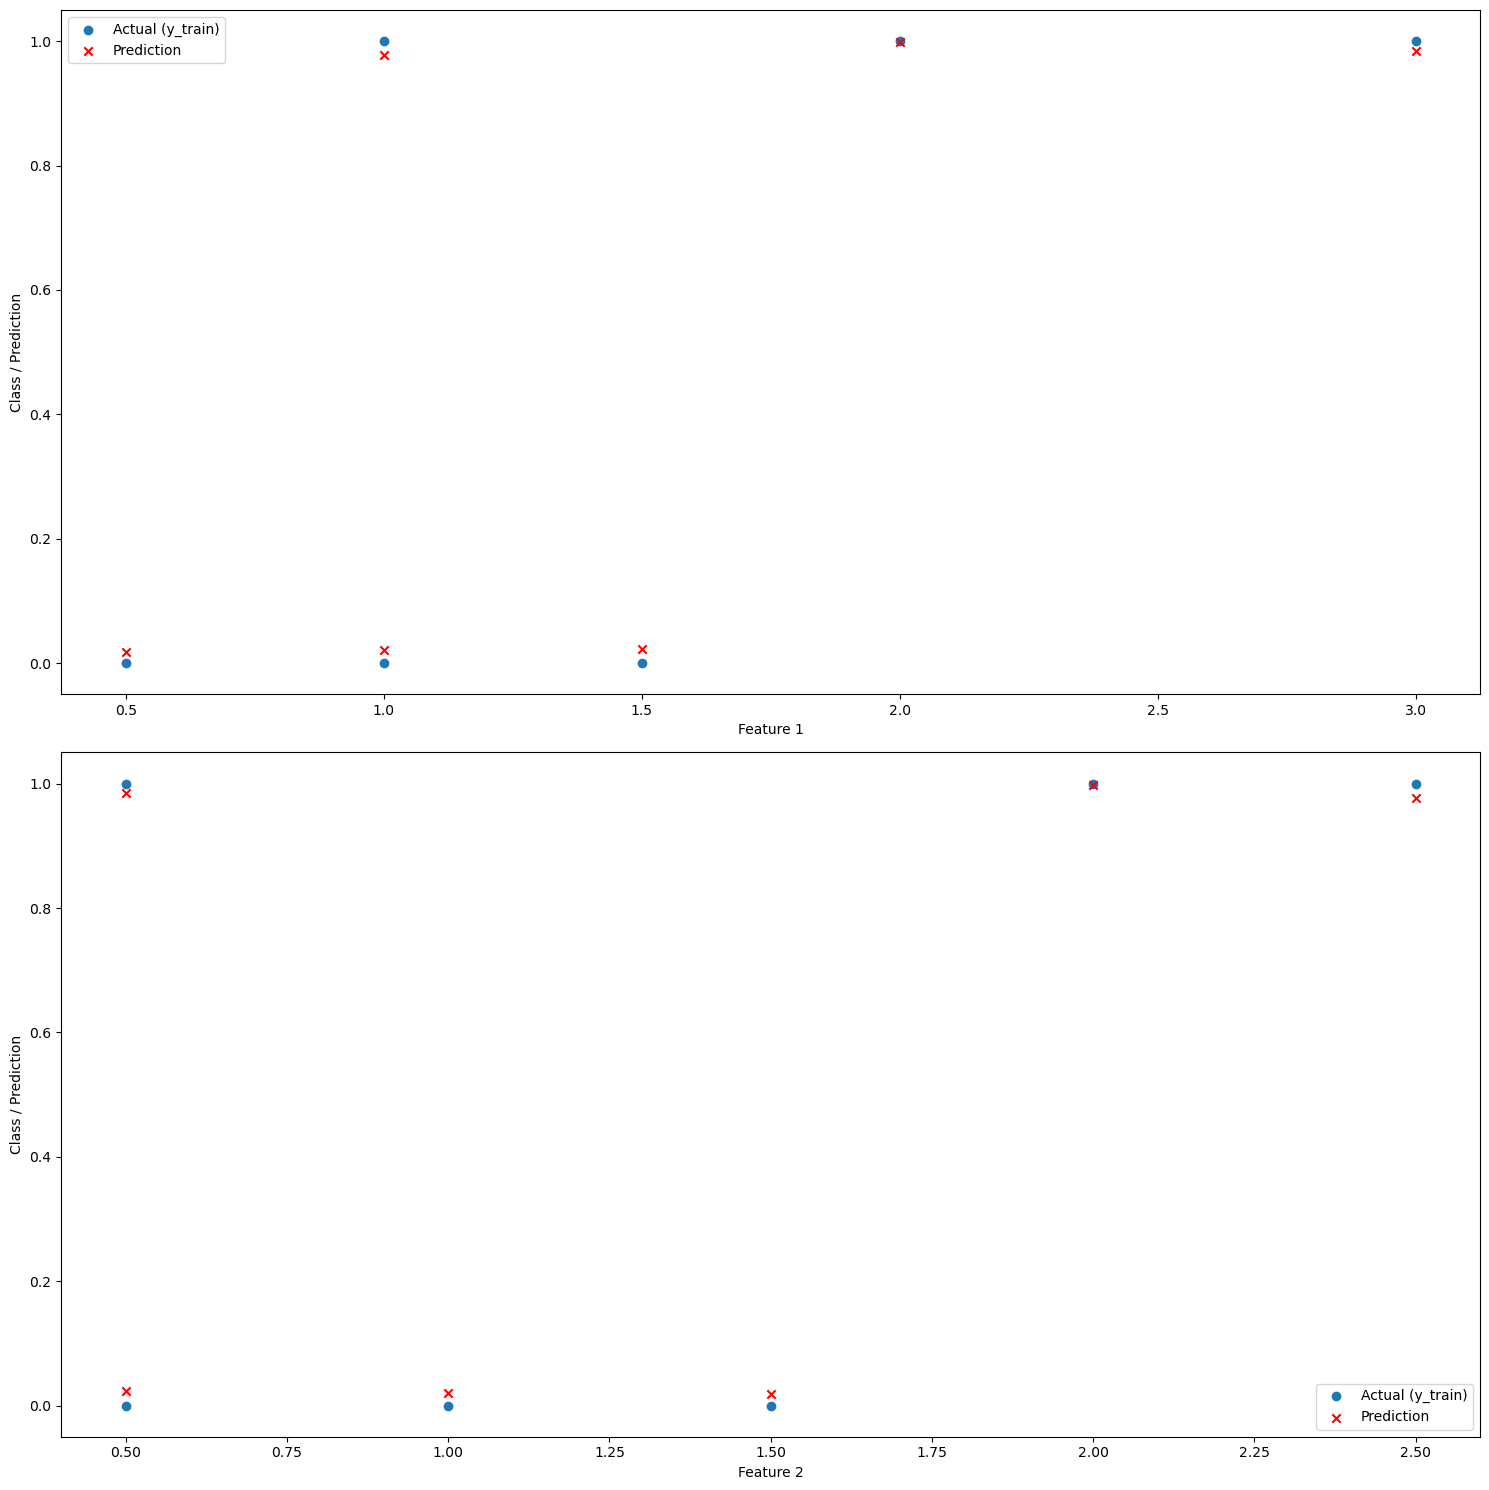

In [70]:
# Create subplots
num_features = 2
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(15, 15))

# Plot predictions against each feature
for i in range(num_features):
    axes[i].scatter(X_train[:, i], y_train, label='Actual (y_train)')
    axes[i].scatter(X_train[:, i], prediction, color='red', marker='x', label='Prediction')
    axes[i].set_xlabel(f'Feature {i + 1}')
    axes[i].set_ylabel('Class / Prediction')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()